TODO:
2. lemmatize? (see if can use eliana's code)
3. remove stopwords
5. look for word embedding [[1](https://github.com/NLPH/NLPH_Resources#embeddings),[2](https://github.com/liorshk/wordembedding-hebrew)]
6. understand deep LDA from [reference](https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05) (possibly different embedding); go over [gensim](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)
7. use other features in addition to words counters (e.g. length, english words, numbers, etc.)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import random
from pathlib import Path
from time import time
from datetime import datetime
from tqdm import tqdm, tnrange, tqdm_notebook
from pprint import pprint
from warnings import warn
from datetime import datetime
import itertools
from collections import Counter, OrderedDict
from bidi import algorithm as bidi
from hebrew_stopwords import hebrew_stopwords

In [3]:
mpl.rcParams.update({'font.size': 13})

# Load data

In [4]:
DATA = Path('Data')
meta = pd.read_csv(DATA/'meta.csv')
df = pd.read_csv(DATA/'data.csv')

# Parser

In [5]:
from Parser import Parser, show_freqs, ordered_counter, EXTRA_STOPWORDS

# EDA

In [6]:
p = Parser(df, meta)

In [7]:
p.one_hot.head()

,1,10,100,12,15,2,20,2016,2017,3,...,תלוי,תלמידים,תמיד,תן,תנאי,תקנות,תקציב,תקציבים,תשובה,תשובות
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2,4,2,1,1,0,0,1,...,0,0,0,0,0,0,1,0,2,3
3,11,0,0,1,0,8,1,0,0,0,...,0,0,1,0,0,7,0,0,1,0
4,0,4,1,1,0,0,3,0,0,0,...,0,0,0,3,1,0,0,0,2,4


C:\Users\idogr\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


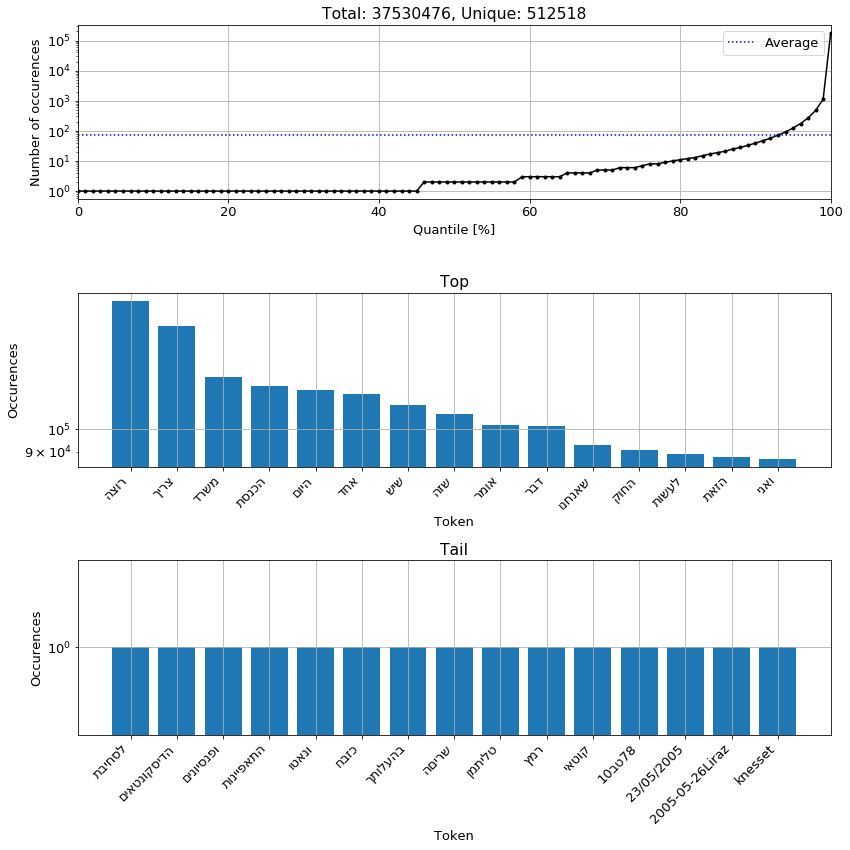

In [8]:
p.show_tokens()

In [9]:
ordered_counter(p.tokens)

OrderedDict([('רוצה', 180334),
             ('צריך', 160272),
             ('משרד', 126727),
             ('הכנסת', 121774),
             ('היום', 119409),
             ('אחד', 117367),
             ('שיש', 111351),
             ('שזה', 106945),
             ('אומר', 101879),
             ('דבר', 101410),
             ('שאנחנו', 92584),
             ('החוק', 90525),
             ('לעשות', 89092),
             ('הזאת', 87867),
             ('ואני', 87059),
             ('האלה', 84802),
             ('עכשיו', 82486),
             ('הוועדה', 80471),
             ('כמה', 79015),
             ('שאני', 78981),
             ('לגבי', 78670),
             ('חוק', 78594),
             ('אפשר', 76972),
             ('ישראל', 76090),
             ('הרבה', 74340),
             ('חושב', 69461),
             ('וגם', 69165),
             ('לפי', 67494),
             ('נכון', 66462),
             ('שהם', 64505),
             ('רוצים', 63689),
             ('ראש', 61232),
             ('סעיף', 61180),
 

In [10]:
print(p.full_protocol())

________
:
p_tali

2007-04-22Liraz



הכנסת השבע עשרה נוסח לא מתוקן

מושב שני

פרוטוקול מס'

מישיבת ועדת הכספים

יום שלישי, ב' באדר התשס"ז (20 בפברואר 2007) בשעה 11:10

ס ד ר ה י ו ם

1. תקנות ניירות ערך (אופן הצעת ניירות ערך לציבור), התשס"ו-2007

2. תקנות ניירות ערך (חיתום) (תיקון), התשס"ז-2007

3. תקנות ניירות ערך (הודעה משלימה וטיוטת תשקיף), התשס"ז-2007

4. תקנות ניירות ערך (פרטי תשקיף, מבנהו וצורתו) (תיקון), התשס"ז-2007

5. תקנות ניירות ערך (תקופה להגשת הזמנות לניירות ערך המוצעים בתשקיף) (תיקון),

 התשס"ז-2007

________
נכחו:


________
חברי הוועדה:
יעקב ליצמן – היו"ר

חיים אורון

זאב אלקין

אבישי ברוורמן

יצחק גלנטי

אבשלום וילן

יצחק וקנין

אחמד טיבי

שלי יחימוביץ

אביגדור יצחקי

אמנון כהן

סופה לנדבר

סטס מיסז'ניקוב

אורית נוקד

ניסן סלומינסקי

ראובן ריבלין

________
מוזמנים:
עו"ד שמשון אלבק - יועץ משפטי, רשות לניירות ערך

עו"ד דניאל רימון - רשות לניירות ערך

רון אמיחי - רואה חשבון, רשות לניירות ערך

משה ברקת - מנהל מחלקת תאגידים, רשות לניירות ערך

דוד אדר - מחלקת תאגידים, רשות 

הישיבה ננעלה בשעה 12:25


In [11]:
print(p.full_protocol())

________
:
הכנסת העשרים

מושב שלישי

פרוטוקול מס' 596

מישיבת ועדת הכספים

יום רביעי, כ"ח בכסלו התשע"ז (28 בדצמבר 2016), שעה 14:30

________
סדר היום:
שינויים בתקציב לשנת 2016

________
נכחו:


________
חברי הוועדה::
משה גפני – היו"ר

מכלוף מיקי זוהר – מ"מ היו"ר

דוד ביטן

מיקי לוי

רועי פולקמן

מיקי רוזנטל

________
חברי הכנסת:
מיכאל מלכיאלי

אברהם נגוסה

קסניה סבטלובה

סתיו שפיר

________
מוזמנים::
שמואל ליטוב - סמנכ"ל משרד נגב וגליל

יובל טלר חסון - רפרנט שיכון, אגף התקציבים, משרד האוצר

איתי טמקין - אגף התקציבים, משרד האוצר

________
מנהל הוועדה:
טמיר כהן

________
רישום פרלמנטרי:
אהובה שרון, חבר המתרגמים

שינויים בתקציב לשנת 2016

________
היו"ר משה גפני:
אני מחדש את הישיבה. אני מקווה שהיא תהיה קצרה. אני מתנצל על השעה. אנחנו קבענו את השעה לפי ההצבעות. אמרנו שעה 2:30 כיוון שברושי אמר שלא תהיה הצבעה על הנושא שלו של החקלאות אלא זאת רק הצעה לסדר ולכן אמרנו 2:30.

________
סתיו שפיר (המחנה הציוני):
זאת הצעה לוועדת חקירה פרלמנטרית.

________
היו"ר משה גפני:
ההצעה לוועדת חקירה פרלמנטרית 

הישיבה ננעלה בשעה 15:28.


In [12]:
print(p.full_protocol())

________
:
Knesset

2007-01-25Liraz



הכנסת השבע-עשרה נוסח לא מתוקן

מושב שני

פרוטוקול מס' 82

מישיבת ועדת הפנים והגנת הסביבה

יום שני, ד ' בטבת התשס"ז (25.12.2006), בשעה 12:00

סדר היום: הצעה לסדר היום (דיון מהיר): שינויים במדיניות משרד הפנים, הפוגעים ביהודי התפוצות, בעולים החדשים ובבני משפחותיהם, של חה"כ מרינה סולודקין.

________
נכחו:


________
חברי הוועדה:
גאלב מג'אדלה – היו"ר

יצחק אהרונוביץ

דב חנין

מרינה סולודקין

יוסי ביילין

________
מוזמנים:
ששי קציר – מנהל מינהל האוכלוסין, משרד הפנים

יוני צ'ונה – משרד הפנים

דוריס קריאף – מנהלת ענף ארצי תעוד וזכאות, המשרד לקליטת עלייה

מיה פוגל – עוזרת מנהל החטיבה לפעולות הקליטה, הסוכנות היהודית

עו"ד ניקול מאור – המרכז לפלורליזם יהודי

דבי גולד – האגודה לזכויות האזרח

יחזקאל לביא – יועץ הוועדה

אלי זרחין

ייעוץ משפטי: עידו בן נתן

מנהלת הוועדה: יפה שפירא

רשמת פרלמנטרית: מיטל בר שלום











הצעה לסדר היום (דיון מהיר): שינויים במדיניות משרד הפנים, הפוגעים ביהודי התפוצות, בעולים החדשים ובבני משפחותיהם, של חה"כ מרינה סולודקין.

______

הישיבה ננעלה בשעה 13:00


In [13]:
print(p.full_protocol())

________
:
הכנסת העשרים

מושב שלישי

פרוטוקול מס'

מישיבת ועדת הכספים

יום שלישי, ט"ז באדר התשע"ז (14 במרץ 2017), שעה 11:15

________
סדר היום:
הצעת חוק הגליל (תיקון מס' 12) (הארכת התקופה למתן עדיפות למשק הלול במרום הגליל), התשע"ז-2017

________
נכחו:


________
חברי הוועדה::
משה גפני – היו"ר

נאוה בוקר

דוד ביטן

איתן ברושי

יהודה גליק

יצחק וקנין

מכלוף מיקי זוהר

מיקי לוי

רחל עזריה

מיקי רוזנטל

________
חברי הכנסת:
יפעת שאשא ביטון

________
מוזמנים::
אביטל שטרנברג - מחלקת ייעוץ וחקיקה, משרד המשפטים

עמרי בן צבי - מחלקת ייעוץ וחקיקה, משרד המשפטים

שירה ברגמן - רכזת מים וחקלאות, אג"ת, משרד האוצר

צפניה שאילקר - מנהל מחוז, יו"ר מועצת הלול, משרד החקלאות ופיתוח הכפר

אסף לוי - סמנכ"ל גורמי יצור, משרד החקלאות ופיתוח הכפר

אסתר זנזורי פריאל - עו"ד, משרד החקלאות ופיתוח הכפר

אפרת ורד - עו"ד, משרד החקלאות ופיתוח הכפר

שמואל לויט - מנכ"ל, המועצה לענף הלול

תומס מנור - יועץ משפטי, המועצה לענף הלול

שלמה סויסה - עובד לול, מושב צוריאל

דוד אוחנה - מועצת הלול, זרעית

דובי אמיתי - נשיא, התאחדות 

הישיבה ננעלה בשעה 14:05


In [14]:
print(p.full_protocol())

________
:
ôøåèå÷åì ùì éùéáú åòãä

ôøåèå÷åì ùì éùéáú åòãä

àåîðéè÷

2017-10-26OMNITECH



הכנסת העשרים

מושב שלישי

פרוטוקול מס' 4

מישיבת הוועדה המשותפת לוועדת הכנסת ולוועדת החוקה, חוק ומשפטלדיון בהצעת חוק יסוד: ישראל – מדינת הלאום של העם היהודי

יום שני, ג' בחשון התשע"ח (23 באוקטובר 2017), שעה 10:00

________
סדר היום:
הצעת חוק-יסוד: ישראל – מדינת הלאום של העם היהודי

________
נכחו:


________
חברי הוועדה::
אמיר אוחנה – היו"ר

ניסן סלומינסקי – מ"מ היו"ר

רוברט אילטוב

יואב בן צור

יעל גרמן

ציפי לבני

אורי מקלב

רויטל סויד

טלי פלוסקוב

________
חברי הכנסת:
טלב אבו עראר

יוסף ג'בארין

תמר זנדברג

דב חנין

אחמד טיבי

אורי מקלב

עודד פורר

________
מוזמנים::
ממונה בכיר-מח' יעוץ וחקיקה, משרד המשפטים  - איל זנדברג

עוזר ראשי הלשכה המשפטית, משרד הכלכלה  - אור רוזנמן

אחראית קשרי ממשל, המכון הישראלי לדמוקרטיה  - דורון סלע

חוקר, המכון הישראלי לדמוקרטיה  - עמיר פוקס

יועץ משפטי, התנועה למשילות ודמוקרטיה - שמחה רוטמן

נשיא, המכון לאסטרטגיה ציונית  - יואל גולובנסקי

נציג, המכון לאסטרטגיה ציונ

הישיבה ננעלה בשעה 12:25.
